In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.metrics import silhouette_score
import scipy.cluster.hierarchy as shc

In [2]:
data = pd.read_csv('components.csv')
min_data=data.drop(['id','Component Name','Functionality'],axis=1)
min_data.fillna(method='ffill',inplace=True)
min_data.head()

,Language,Type,Domain,Visibility
0,Java,JSP,Educational,UI
1,Java,JSP,Reservation,UI
2,Java,JSP,Booking,UI
3,JavaScript,React,Booking,UI
4,Java,JSP,Hotel Booking,UI


In [3]:
unique_words=(min_data['Language'].append(min_data['Type'].append(min_data['Domain'].append(min_data['Visibility'])))).unique()

In [4]:
print(unique_words)

['Java' 'JavaScript' 'JSP' 'React' 'Educational' 'Reservation' 'Booking'
 'Hotel Booking' 'Finance' 'Train Booking' 'Flight Booking' 'Payment'
 'Library Management' 'UI' 'Function']


In [5]:
bag_of_words={}
for i in range(len(unique_words)):
    bag_of_words[unique_words[i]]=i

print(bag_of_words)

{'Java': 0, 'JavaScript': 1, 'JSP': 2, 'React': 3, 'Educational': 4, 'Reservation': 5, 'Booking': 6, 'Hotel Booking': 7, 'Finance': 8, 'Train Booking': 9, 'Flight Booking': 10, 'Payment': 11, 'Library Management': 12, 'UI': 13, 'Function': 14}


In [7]:
for i in range(len(unique_words)):
    min_data=min_data.replace(unique_words[i],i)
min_data.head()

,Language,Type,Domain,Visibility
0,0,2,4,13
1,0,2,5,13
2,0,2,6,13
3,1,3,6,13
4,0,2,7,13


In [8]:
X_val=min_data.iloc[:, [0, 1, 2,3]].values
X_val

array([[ 0,  2,  4, 13],
       [ 0,  2,  5, 13],
       [ 0,  2,  6, 13],
       [ 1,  3,  6, 13],
       [ 0,  2,  7, 13],
       [ 1,  3,  7, 13],
       [ 0,  2,  4, 13],
       [ 1,  3,  4, 13],
       [ 0,  0,  8, 14],
       [ 1,  1,  8, 14],
       [ 0,  0,  9, 14],
       [ 0,  0,  7, 14],
       [ 0,  0, 10, 14],
       [ 0,  2, 11, 13],
       [ 1,  3, 11, 13],
       [ 0,  0, 11, 14],
       [ 1,  1, 11, 14],
       [ 0,  2,  9, 13],
       [ 0,  2,  7, 13],
       [ 1,  3,  9, 13],
       [ 1,  3,  7, 13],
       [ 1,  3, 12, 13],
       [ 0,  2, 12, 13],
       [ 0,  2, 12, 13],
       [ 1,  3, 12, 13],
       [ 0,  2,  9, 13],
       [ 1,  3,  9, 13],
       [ 0,  2,  7, 13],
       [ 1,  3,  7, 13],
       [ 0,  2,  6, 13],
       [ 1,  3,  6, 13],
       [ 1,  3, 12, 13],
       [ 0,  2, 12, 13],
       [ 0,  2, 10, 13],
       [ 1,  3, 10, 13],
       [ 0,  2, 10, 13],
       [ 1,  3, 10, 13],
       [ 1,  1,  7, 14],
       [ 1,  1,  9, 14],
       [ 1,  1, 10, 14]])

In [9]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_val)

X_normalized = normalize(X_scaled)
  
X_normalized = pd.DataFrame(X_normalized)

In [32]:
pca = PCA(n_components = 2)
X_principal = pca.fit_transform(X_normalized)
X_principal = pd.DataFrame(X_principal)
X_principal.columns = ['P1', 'P2']
X_principal

,P1,P2
0,-0.342548,-0.607483
1,-0.385386,-0.658881
2,-0.438697,-0.715177
3,0.746514,-0.235668
4,-0.496620,-0.758060
5,0.853360,-0.185669
6,-0.342548,-0.607483
7,0.545947,-0.281326
8,-0.872836,0.601530
9,-0.143749,0.992445


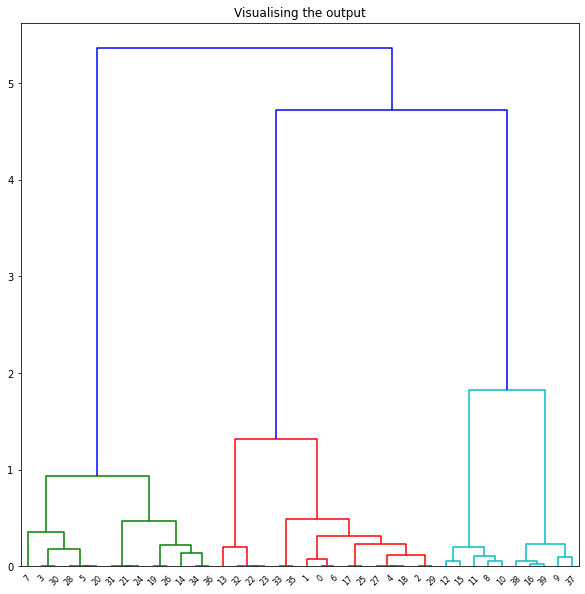

In [11]:
plt.figure(figsize =(10, 10))
plt.title('Visualising the output')
dendrogram = shc.dendrogram((shc.linkage(X_principal, method ='ward')))
plt.axhline(y=11, color='r', linestyle='--')

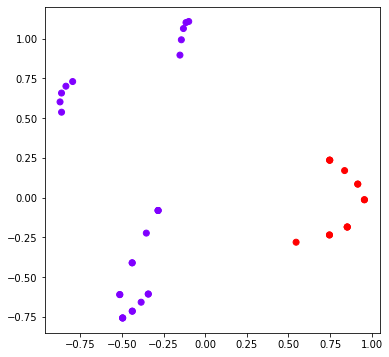

In [27]:
ac2 = AgglomerativeClustering(n_clusters = 2)

plt.figure(figsize =(6, 6))
plt.scatter(X_principal['P1'], X_principal['P2'], 
           c = ac2.fit_predict(X_principal), cmap ='rainbow')
plt.show()

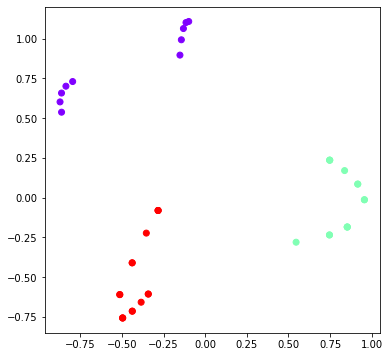

In [28]:
ac3 = AgglomerativeClustering(n_clusters = 3)

plt.figure(figsize =(6, 6))
plt.scatter(X_principal['P1'], X_principal['P2'], 
           c = ac3.fit_predict(X_principal), cmap ='rainbow')
plt.show()

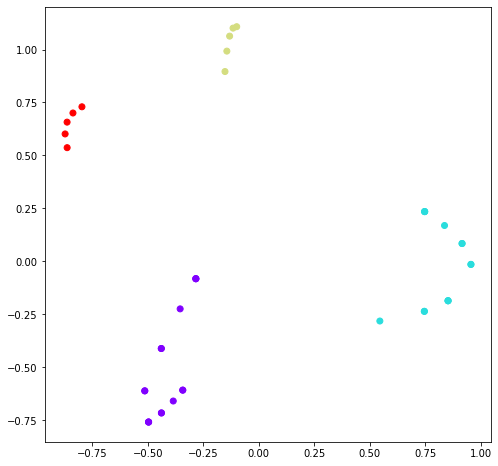

In [60]:
ac4 = AgglomerativeClustering(n_clusters = 4)

plt.figure(figsize =(8, 8))
plt.scatter(X_principal['P1'], X_principal['P2'], 
           c = ac4.fit_predict(X_principal), cmap ='rainbow')

plt.show()

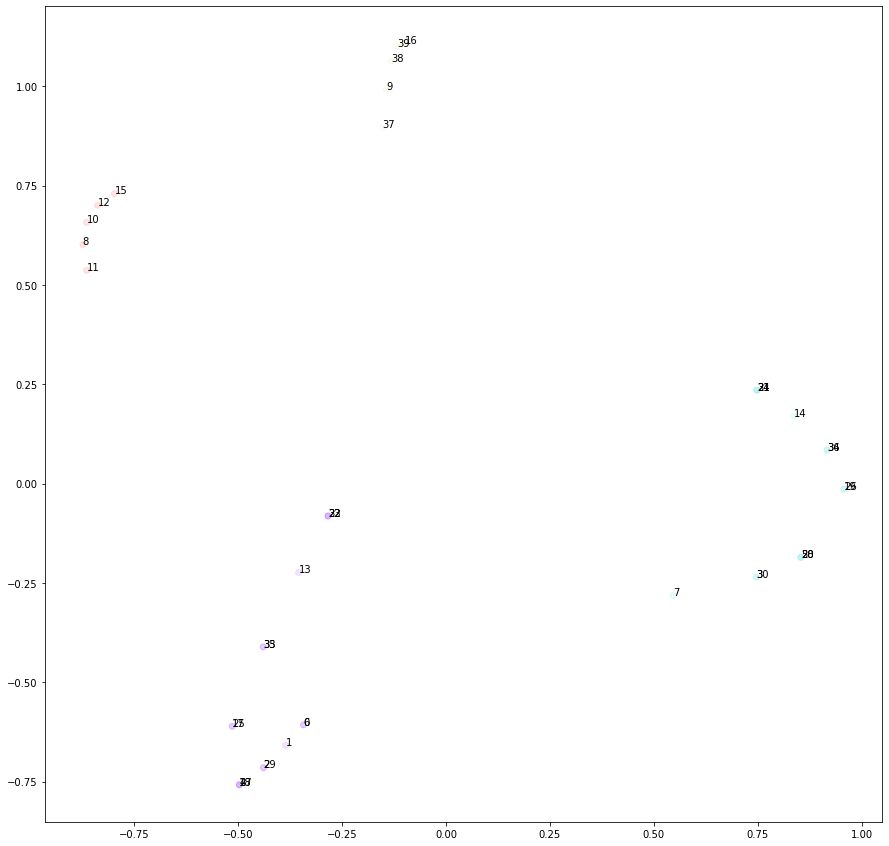

In [62]:
plt.figure(figsize =(15, 15))
plt.scatter(X_principal['P1'], X_principal['P2'], 
           c = ac4.fit_predict(X_principal), cmap ='rainbow',alpha=0.1)
for i in range(40):
    plt.text(X_principal.iloc[i]['P1'],X_principal.iloc[i]['P2'], str(i))
plt.show()

In [59]:
len(X_principal['P2'].unique())

28

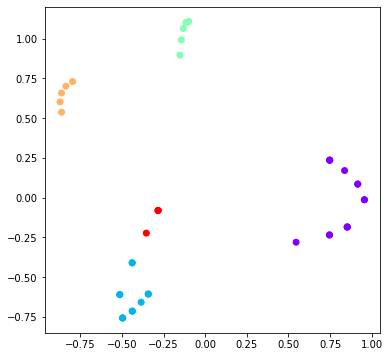

In [29]:
ac5 = AgglomerativeClustering(n_clusters = 5)

plt.figure(figsize =(6, 6))
plt.scatter(X_principal['P1'], X_principal['P2'], 
           c = ac5.fit_predict(X_principal), cmap ='rainbow')
plt.show()

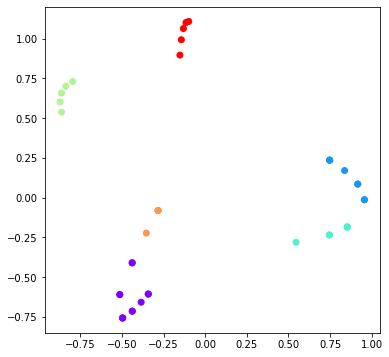

In [23]:
ac6 = AgglomerativeClustering(n_clusters = 6)

plt.figure(figsize =(6, 6))
plt.scatter(X_principal['P1'], X_principal['P2'], 
           c = ac6.fit_predict(X_principal), cmap ='rainbow')
plt.show()

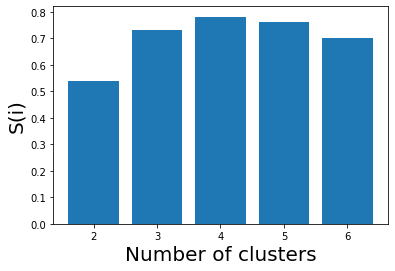

In [31]:
k = [2, 3, 4, 5, 6]

# Appending the silhouette scores of the different models to the list
silhouette_scores = []
silhouette_scores.append(
		silhouette_score(X_principal, ac2.fit_predict(X_principal)))
silhouette_scores.append(
		silhouette_score(X_principal, ac3.fit_predict(X_principal)))
silhouette_scores.append(
		silhouette_score(X_principal, ac4.fit_predict(X_principal)))
silhouette_scores.append(
		silhouette_score(X_principal, ac5.fit_predict(X_principal)))
silhouette_scores.append(
		silhouette_score(X_principal, ac6.fit_predict(X_principal)))

# Plotting a bar graph to compare the results
plt.bar(k, silhouette_scores)
plt.xlabel('Number of clusters', fontsize = 20)
plt.ylabel('S(i)', fontsize = 20)
plt.show()


In [63]:
print("Enter query for component search")

Enter query for component search


In [8]:
query="A java component for railway reservation containing login using username and password with captcha functionality ,date picker,dropdown for cities,train class and quota,calculation of fare with distance , train class and quota, dedicated payment page with options like debit card , credit card ,upi ,page to display list of trains "

In [9]:
keywords=query.split(' ')

In [66]:
keywords

['A',
 'java',
 'component',
 'for',
 'railway',
 'reservation',
 'containing',
 'login',
 'using',
 'username',
 'and',
 'password',
 'with',
 'captcha',
 'functionality',
 ',date',
 'picker,dropdown',
 'for',
 'cities,train',
 'class',
 'and',
 'quota,calculation',
 'of',
 'fare',
 'with',
 'distance',
 ',',
 'train',
 'class',
 'and',
 'quota,',
 'dedicated',
 'payment',
 'page',
 'with',
 'options',
 'like',
 'debit',
 'card',
 ',',
 'credit',
 'card',
 ',upi',
 ',page',
 'to',
 'display',
 'list',
 'of',
 'trains',
 '']

In [3]:
import nltk
from nltk.corpus import stopwords

In [10]:
stop_words = set(stopwords.words('english'))
len(stop_words)

179

In [ ]:
keywords_min=[]
for word in keywords:
    if word not in stop_words:
        keywords.append(word)
print(keywords_min)